# **LINEAR REGRESSION**

###### *with multiple variable*

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("community_health.csv")

In [3]:
df

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27
...,...,...,...,...,...,...
995,43,female,group E,273,68,22
996,34,female,group D,247,76,16
997,54,female,group B,310,75,27
998,38,male,group E,64,75,7


___
___

## Data Hakkında

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   gender          1000 non-null   object
 2   race/ethnicity  1000 non-null   object
 3   weight          1000 non-null   int64 
 4   height          1000 non-null   int64 
 5   visits          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [5]:
df.describe()

,age,weight,height,visits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.019000,199.045000,67.300000,19.956000
std,14.839166,52.815077,6.285341,6.455055
min,0.000000,45.000000,46.000000,2.000000
25%,36.000000,165.000000,63.000000,15.000000
50%,45.000000,197.000000,67.000000,20.000000
75%,55.000000,236.000000,72.000000,24.000000
max,89.000000,356.000000,86.000000,40.000000


In [6]:
df.isnull().sum()

age               0
gender            0
race/ethnicity    0
weight            0
height            0
visits            0
dtype: int64

In [7]:
df.corr()

,age,weight,height,visits
age,1.000000,-0.084920,-0.063822,0.539543
weight,-0.084920,1.000000,0.142064,0.543139
height,-0.063822,0.142064,1.000000,-0.385644
visits,0.539543,0.543139,-0.385644,1.000000


___
___

## Veriyi Düzenleme

In [8]:
df.head(3)

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14


In [9]:
df.rename(columns={
    "age" : "yas",
    "gender" : "cins",
    "race/ethnicity" : "irk",
    "weight" : "kilo",
    "height" : "boy"
}, inplace= True)
df.head(2)

,yas,cins,irk,kilo,boy,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23


In [10]:
df["kilo"] = round(df["kilo"]*0.453592)
df.head(2)

,yas,cins,irk,kilo,boy,visits
0,47,female,group D,112.0,65,28
1,26,male,group C,128.0,66,23


In [11]:
df["boy"] = round(df["boy"]*2.54)
df.head(2)

,yas,cins,irk,kilo,boy,visits
0,47,female,group D,112.0,165.0,28
1,26,male,group C,128.0,168.0,23


In [12]:
df["cins"].replace({
    "female" : 0,
    "male" : 1
}, inplace=True)
df.head(2)

,yas,cins,irk,kilo,boy,visits
0,47,0,group D,112.0,165.0,28
1,26,1,group C,128.0,168.0,23


In [13]:
df["irk"].replace({
    "group A" : 1,
    "group B" : 2,
    "group C" : 3,
    "group D" : 4,
    "group E" : 5,
}, inplace=True)

In [14]:
df.iloc[13:18]

,yas,cins,irk,kilo,boy,visits
13,58,0,4,81.0,150.0,22
14,32,0,5,87.0,119.0,30
15,34,0,2,87.0,193.0,11
16,38,0,1,94.0,160.0,19
17,57,0,3,78.0,152.0,22


In [15]:
df.to_csv("community_health_MLR.csv", index=False)

___
___

## Train Test

In [16]:
X = df.drop("visits", axis= 1)
y = df["visits"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [19]:
# help(train_test_split)

In [20]:
X_train.head()

,yas,cins,irk,kilo,boy
26,45,0,4,101.0,196.0
155,21,1,5,85.0,178.0
872,47,1,2,62.0,178.0
383,64,0,4,72.0,173.0
648,50,1,3,93.0,163.0


In [21]:
y_train.head()

26     18
155     8
872    18
383    20
648    24
Name: visits, dtype: int64

In [22]:
X_test.head()

,yas,cins,irk,kilo,boy
890,72,1,2,88.0,175.0
983,47,0,2,79.0,183.0
107,16,0,2,108.0,170.0
609,34,0,2,61.0,168.0
113,50,1,2,133.0,170.0


In [23]:
y_test.head()

890    25
983    20
107    19
609    16
113    29
Name: visits, dtype: int64

___
___

## Lin Regr

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regr = LinearRegression()

In [26]:
regr.fit(X_train, y_train)

LinearRegression()

In [27]:
test_preds = regr.predict(X_test)

In [28]:
test_preds

array([25.53512869, 16.22982385, 15.97912443, 12.46832106, 28.93358077,
       12.389785  , 18.38814689, 12.96058291, 25.8973212 , 16.62758758,
       14.57865887, 17.42854142, 16.76456796, 17.06723232, 28.69096064,
       12.60401467, 17.39141919, 22.89426937, 24.71720408, 11.35643946,
       10.84374258, 30.69086579, 20.46700995, 17.09777173, 23.05278211,
       23.09057772, 22.23810566, 15.12479879, 30.51677773, 14.84632904,
       18.25287147, 27.95266181, 22.8178326 , 28.63934915, 27.25987384,
       12.95169388, 18.30004476, 21.00345594, 10.56079031, 24.31519054,
       19.42928903, 18.61042318, 25.04635549, 21.16227353, 13.32367912,
       16.20588478, 25.28275735,  8.83098891, 19.92054526, 25.91195305,
       20.81099459, 24.30145098, 23.15477623, 16.78292119,  7.84596864,
       17.87425201, 13.83471239, 17.27889091, 29.14270437, 20.62357981,
       21.5864883 , 19.15572275, 13.35185501, 25.3130877 , 18.26486612,
       13.99352998, 19.44864023, 14.05329029, 16.17578659, 35.14

___
___

## Performance

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
print("Theta :     ", round(regr.coef_[0],2))
print("Intercept : ", round(regr.intercept_,2))
print("R^2 :       ", round(r2_score(y_test,test_preds),2))
print("MAE :       ", round(mean_absolute_error(y_test,test_preds),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,test_preds)),2))

Theta :      0.25
Intercept :  22.8
R^2 :        0.84
MAE :        2.24
RMSE :       2.64


In [31]:
df["visits"].mean()

19.956

In [32]:
df["visits"].std()

6.455054742737022

___
___

## FINAL

In [33]:
final = LinearRegression()

In [34]:
final.fit(X,y)

LinearRegression()

In [35]:
y_hat = final.predict(X)

In [36]:
final.coef_

array([ 0.24622291,  0.10675596,  0.017792  ,  0.17551431, -0.17984967])

In [37]:
coef_df = pd.DataFrame(final.coef_, X.columns,columns=["Katsayı"])

In [38]:
coef_df

,Katsayı
yas,0.246223
cins,0.106756
irk,0.017792
kilo,0.175514
boy,-0.179850


In [39]:
print(df["yas"].mean())
print(df["cins"].mean())
print(df["irk"].mean())
print(df["kilo"].mean())
print(df["boy"].mean())

45.019
0.481
3.155
90.283
170.914


In [40]:
insancık = [[25,0,3,45,150]]

In [41]:
final.predict(insancık)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.78631769])

___
___

## Modeli Kaydetmek

In [42]:
from joblib import dump, load

In [43]:
dump(final, "dr_visit_1.joblib")

['dr_visit_1.joblib']

In [44]:
model_yukle = load("dr_visit_1.joblib")

In [45]:
model_yukle.predict(insancık)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.78631769])

___
___

## Residual ve Son Grafik 

In [46]:
residuals = y_hat - y

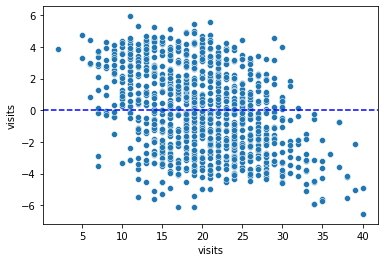

In [47]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y= 0, color="b", ls="--")

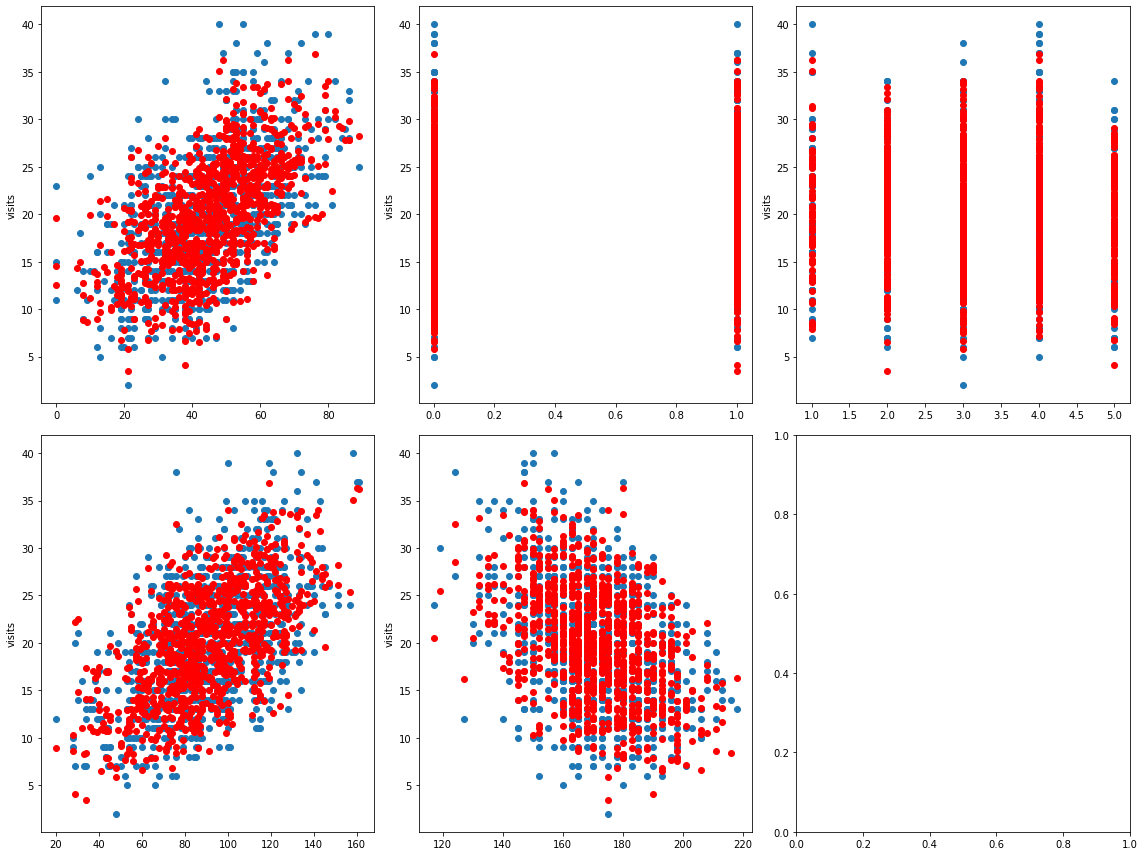

In [48]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

axes[0,0].plot(df['yas'],df['visits'],'o')
axes[0,0].plot(df['yas'],y_hat,'o',color='red')
axes[0,0].set_ylabel("visits")

axes[0,1].plot(df['cins'],df['visits'],'o')
axes[0,1].plot(df['cins'],y_hat,'o',color='red')
axes[0,1].set_ylabel("visits")

axes[0,2].plot(df['irk'],df['visits'],'o')
axes[0,2].plot(df['irk'],y_hat,'o',color='red')
axes[0,2].set_ylabel("visits")

axes[1,0].plot(df['kilo'],df['visits'],'o')
axes[1,0].plot(df['kilo'],y_hat,'o',color='red')
axes[1,0].set_ylabel("visits")

axes[1,1].plot(df['boy'],df['visits'],'o')
axes[1,1].plot(df['boy'],y_hat,'o',color='red')
axes[1,1].set_ylabel("visits")

plt.tight_layout();

___
___

# **https://www.youtube.com/watch?v=EyF_XafkUCk**